In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
students1 = pd.read_csv('archive/student-mat.csv')
students1.dataframeName = 'archive/student-mat.csv'
print(students1.shape)

students2 = pd.read_csv('archive/student-por.csv')
print(students2.shape)

#MERGE AND REMOVE DUPLS

(395, 33)
(649, 33)


In [3]:
print(students1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
cols = list(students1.columns)
print(cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [5]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

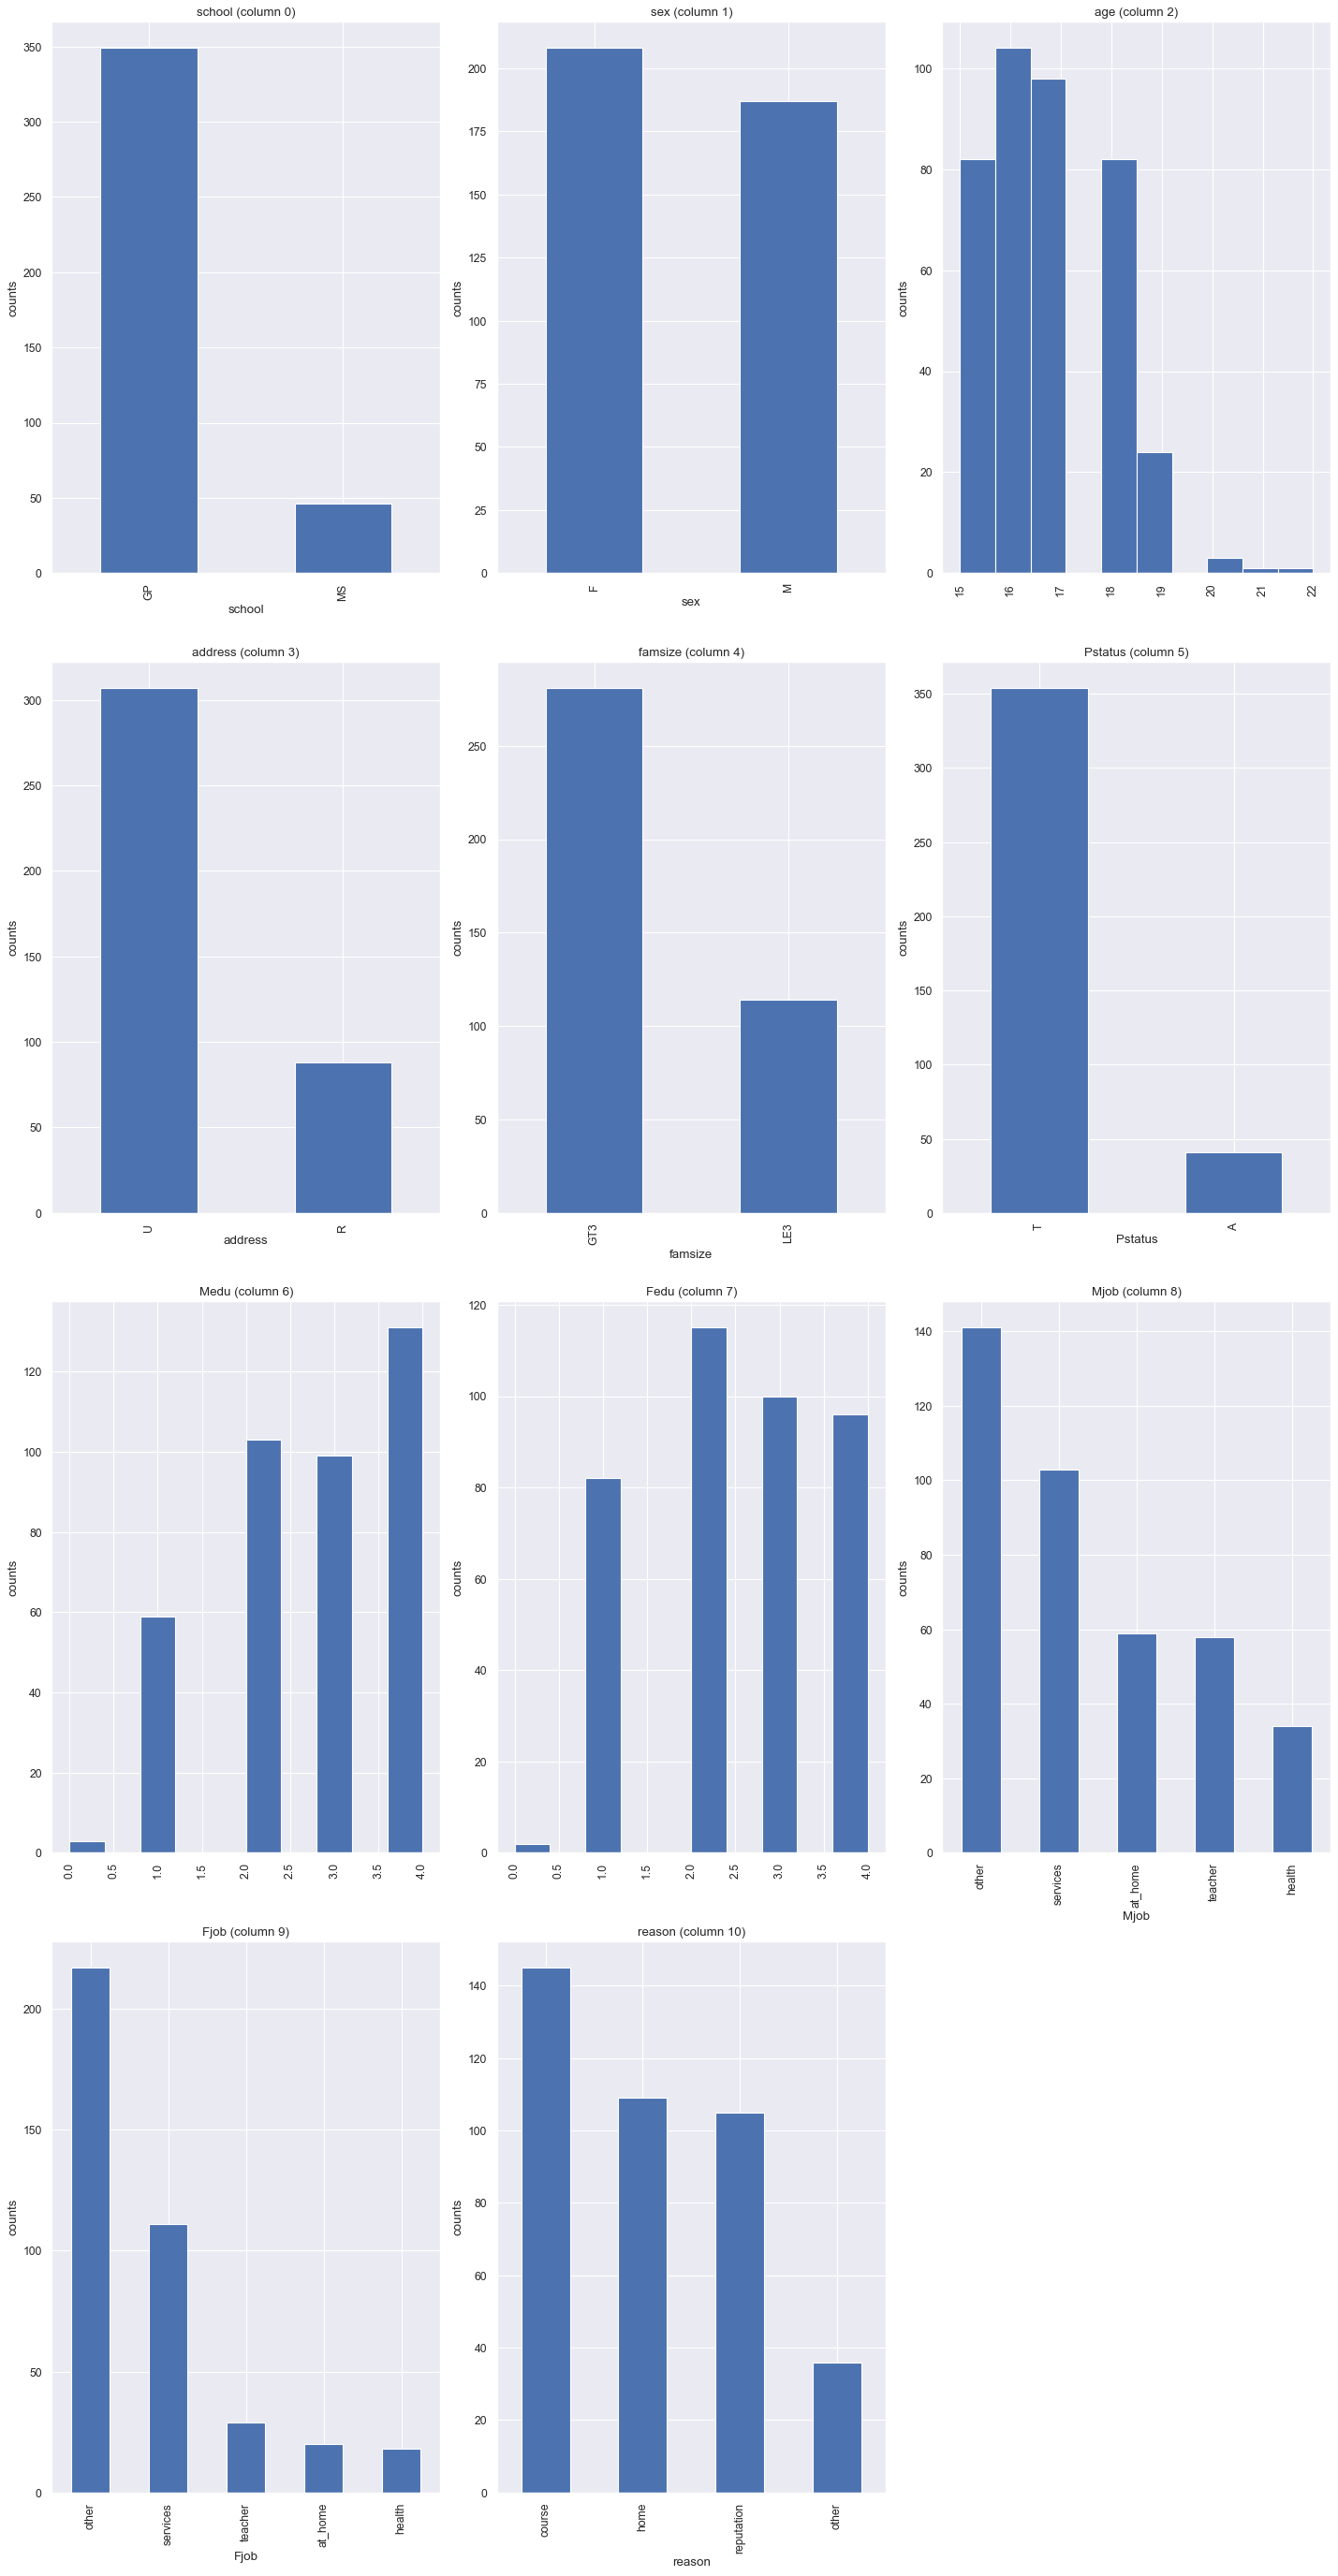

In [6]:
plotPerColumnDistribution(students1, 11, 3)

In [7]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Student Alcohol Consumption', fontsize=15)
    plt.show()

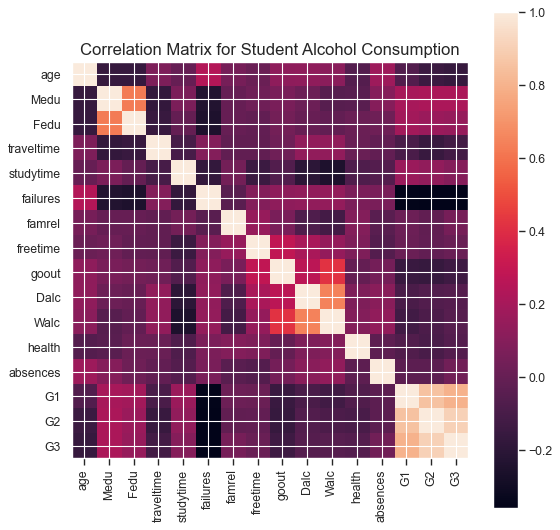

In [8]:
newDF = students1.select_dtypes(include=np.number)
newDF.dataframeName = 'archive/student-mat.csv'
plotCorrelationMatrix(newDF, 8)

In [9]:
#MERGE DALC AND WALC?? 0 AND 1 
#GROUP COLS TO FIND RELEVANCY

In [10]:
#merging dataframes
students1_new = students1.drop(columns = ['G1','G2','G3'])
students2_new = students2.drop(columns = ['G1','G2','G3'])
students = pd.concat([students1_new, students2_new], axis=0)
students.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [11]:
students = students.drop_duplicates(ignore_index= True)

In [12]:
students['id'] = range(1, len(students) + 1)
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,5


In [13]:
dictionary = {}
for i in range(len(students)):
    #dictionary[i] = 'NaN'
    dalc = students.at[i, "Dalc"]
    walc = students.at[i, "Walc"]
    if (dalc >= 4 or walc >= 4):
        dictionary[i] = 1
    else:
        dictionary[i] = 0
        
print(dictionary)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 1, 30: 1, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 1, 62: 0, 63: 1, 64: 1, 65: 0, 66: 1, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 1, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 1, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 1, 130: 0, 131: 0, 132: 0, 133: 1, 134: 0, 135: 0, 136: 1, 137: 0, 138: 

In [14]:
dictionary = {}
for i, row in students.iterrows():
    dalc = row["Dalc"]
    walc = row["Walc"]
    if (dalc >= 4 or walc >= 4):
        dictionary[i] = 1
    else:
        dictionary[i] = 0
        
print(dictionary)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 1, 30: 1, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 1, 62: 0, 63: 1, 64: 1, 65: 0, 66: 1, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 1, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 1, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 1, 130: 0, 131: 0, 132: 0, 133: 1, 134: 0, 135: 0, 136: 1, 137: 0, 138: 

In [15]:
students['alc'] = 0  # Initialize the new column with default values

for i in range(len(students)):
    if (students.iloc[i]['Dalc'] >= 4 or students.iloc[i]['Walc'] >= 4):
        students.at[i, 'alc'] = 1
    else:
        students.at[i, 'alc'] = 0

In [16]:
students.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,id,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,3,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,4,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,5,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,6,0
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,7,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,6,8,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,9,0
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,10,0


In [17]:
fam_columns = ['Medu', 'Fedu', 'famrel']
grades_columns = ['failures', 'absences']
char_columns = ['age', 'health']
lifestyle_columns = ['traveltime', 'studytime', 'freetime', 'goout']

family = students[fam_columns].copy()
grades = students[grades_columns].copy()
char = students[char_columns].copy()
lifestyle = students[lifestyle_columns].copy()

In [18]:
print(family)

      Medu  Fedu  famrel
0        4     4       4
1        1     1       5
2        1     1       4
3        4     2       3
4        3     3       4
...    ...   ...     ...
1000     2     3       5
1001     3     1       4
1002     1     1       1
1003     3     1       2
1004     3     2       4

[1005 rows x 3 columns]


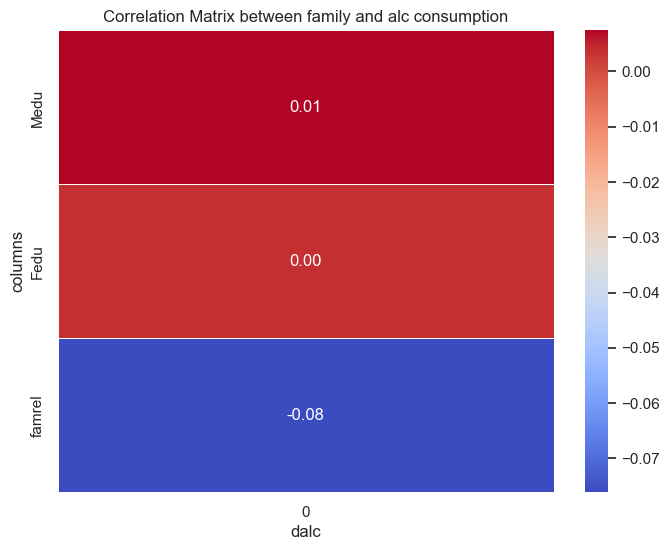

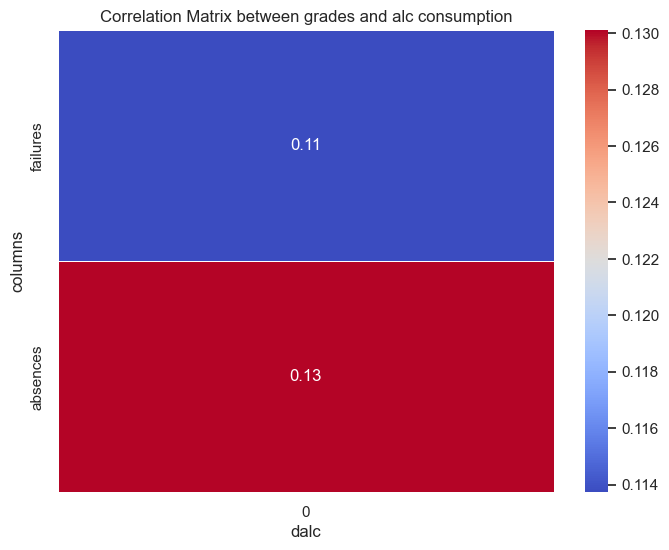

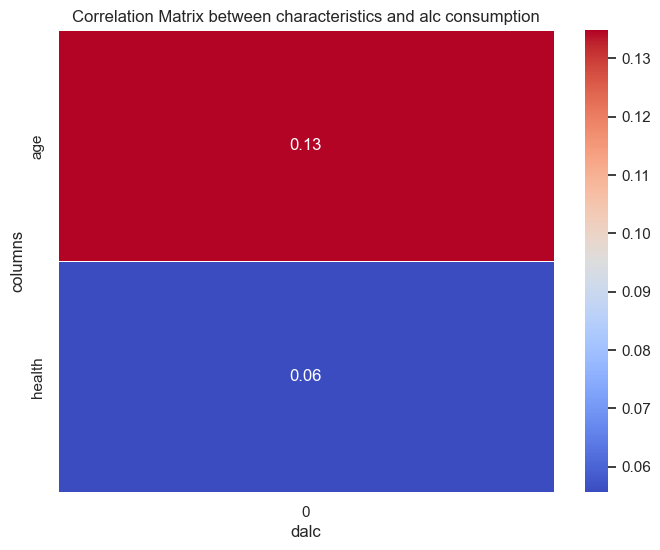

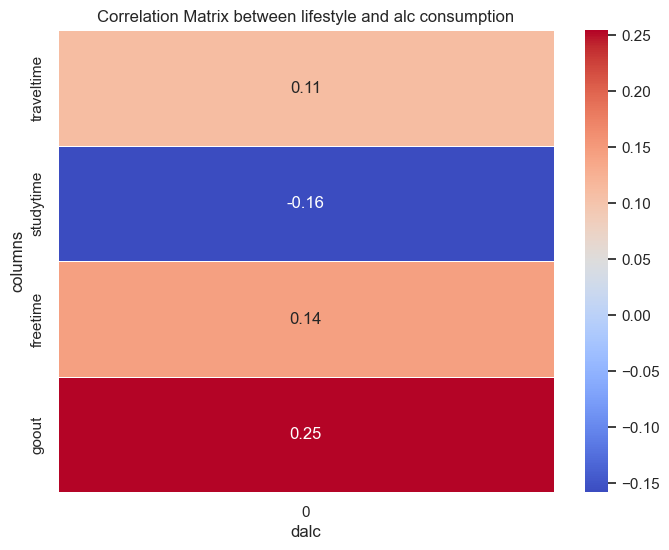

In [19]:
# Extract the single variable column from df2
alcohol_consumption = students['Dalc']

#FAMILY
# Calculate correlation coefficients
correlation_matrix = family.corrwith(alcohol_consumption)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between family and alc consumption")
plt.xlabel("dalc")
plt.ylabel("columns")
plt.show()

#GRADES
# Calculate correlation coefficients
correlation_matrix = grades.corrwith(alcohol_consumption)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between grades and alc consumption")
plt.xlabel("dalc")
plt.ylabel("columns")
plt.show()

#CHAR
# Calculate correlation coefficients
correlation_matrix = char.corrwith(alcohol_consumption)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between characteristics and alc consumption")
plt.xlabel("dalc")
plt.ylabel("columns")
plt.show()

#LIFESTYLE
# Calculate correlation coefficients
correlation_matrix = lifestyle.corrwith(alcohol_consumption)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between lifestyle and alc consumption")
plt.xlabel("dalc")
plt.ylabel("columns")
plt.show()

In [20]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(index=students['absences'],columns=students['alc'])
print(cross_tab)


alc         0   1
absences         
0         282  53
1          12   3
2         141  30
3          12   3
4         114  28
5          15   2
6          60  18
7          10   0
8          41  21
9           8   2
10         28   8
11          5   3
12         15   9
13          0   4
14         13   6
15          3   2
16          8   9
17          1   0
18          5   3
19          0   1
20          3   1
21          2   1
22          2   3
23          1   0
24          2   0
25          1   0
26          2   0
28          0   1
30          1   1
32          1   0
38          1   0
40          1   0
54          0   1
56          1   0
75          1   0


In [23]:
# present the above data better
# update the sets of columns
# what areas of a student's life are more likely to affect the likeliness of them having alcoholic tendencies

# models:
# https://scikit-learn.org/stable/supervised_learning.html
# nearest neighbours, svm, nb
# https://visualstudiomagazine.com/articles/2023/03/01/naive-bayes-scikit.aspx

# 1-4-2024
# model weights and tuning
# compare all
# where are the categoricals??
# extract siignificnce of columns - like p values below

In [24]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
absences = students['goout'].array.reshape(-1, 1)
neigh.fit(absences, students['alc'])
print(neigh.predict(np.array([[5]]).reshape(1, -1)))
# try multiple predictors

[1]


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#iris = load_iris(as_frame=True)
X = students[["absences", "alc"]]
y = X['alc']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

AttributeError: 'DataFrame' object has no attribute 'target_names'

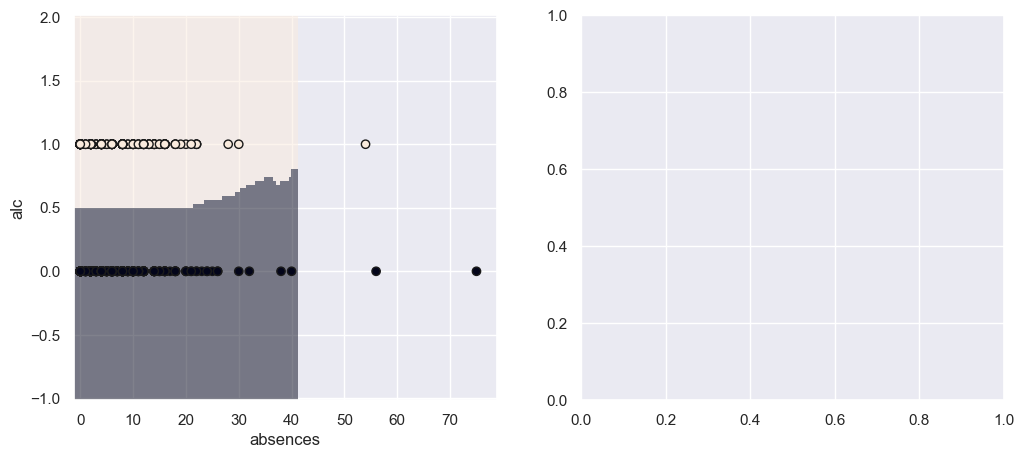

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        #xlabel=students['feature_names'][0],
        #ylabel=students.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        students.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

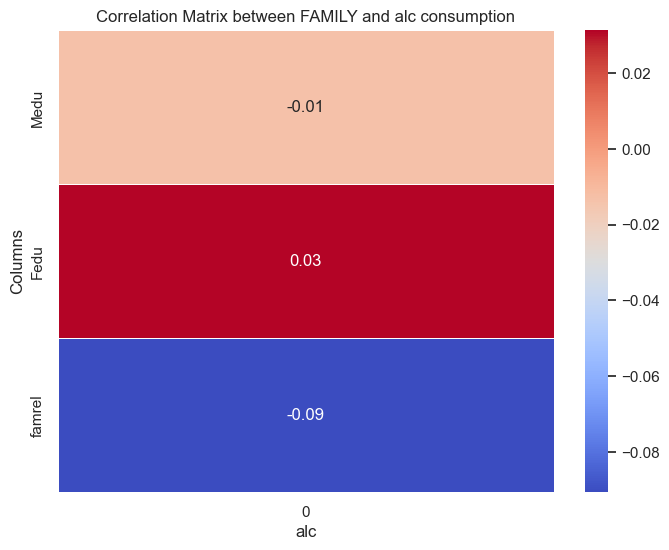

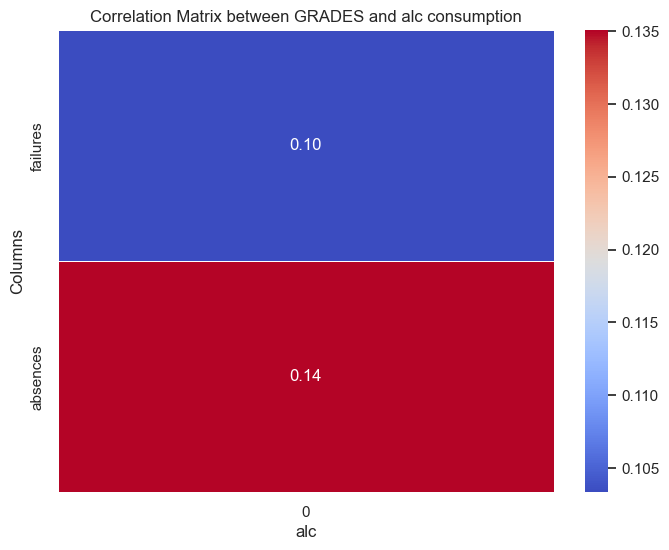

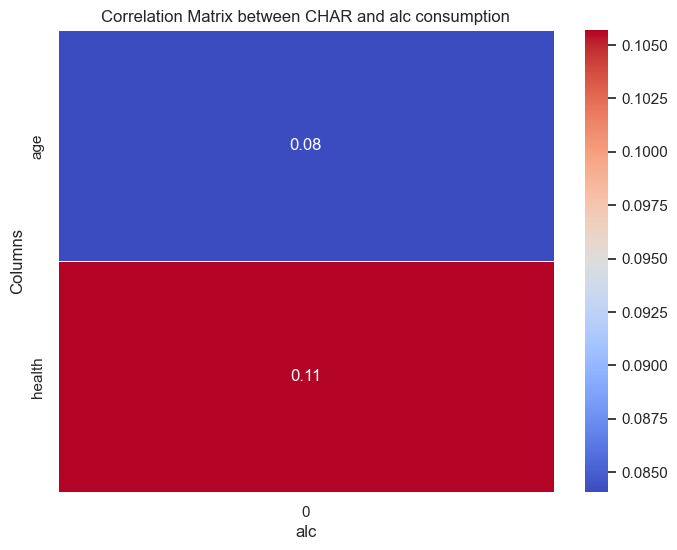

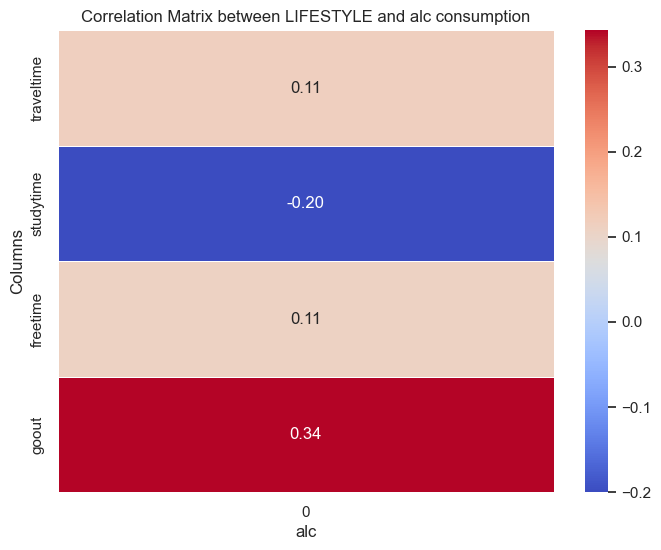

For school against alcohol consumption, the p-value is 0.6824192929728525 and hence we accept the null hypothesis with 1 degrees of freedom

For sex against alcohol consumption, the p-value is 9.160676916814838e-22 and hence we reject the null hypothesis with 1 degrees of freedom

For age against alcohol consumption, the p-value is 0.006069051034598225 and hence we reject the null hypothesis with 7 degrees of freedom

For address against alcohol consumption, the p-value is 0.3170208235612169 and hence we accept the null hypothesis with 1 degrees of freedom

For famsize against alcohol consumption, the p-value is 0.07730865181355791 and hence we accept the null hypothesis with 1 degrees of freedom

For Pstatus against alcohol consumption, the p-value is 0.5503227980195815 and hence we accept the null hypothesis with 1 degrees of freedom

For Medu against alcohol consumption, the p-value is 0.019611518148401307 and hence we reject the null hypothesis with 4 degrees of freedom

For Fedu a

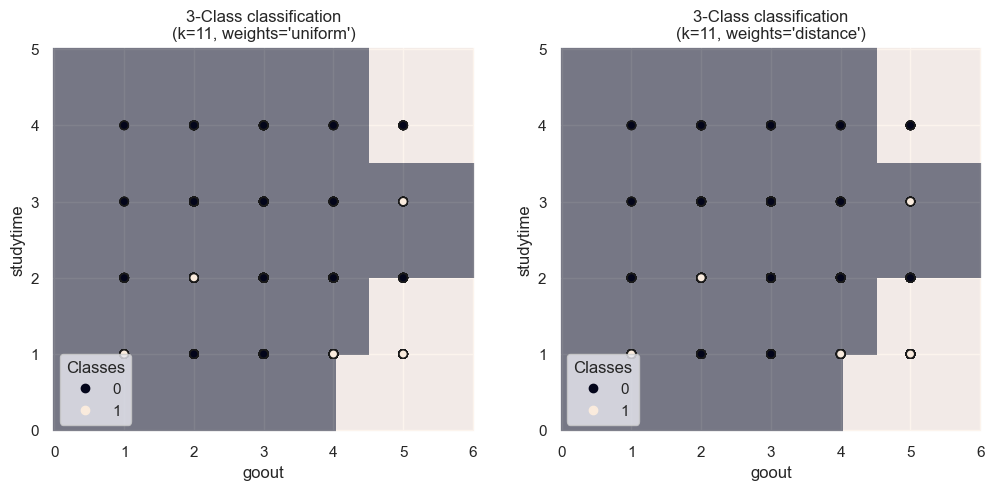

In [51]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# Extract the single variable column from df2
alcohol_consumption = students['alc']

# Define subsets of your data
data_subsets = {'FAMILY': family, 'GRADES': grades, 'CHAR': char, 'LIFESTYLE': lifestyle}

# Plot correlation matrices for each subset
for subset_name, subset_data in data_subsets.items():
    # Calculate correlation coefficients
    correlation_matrix = subset_data.corrwith(alcohol_consumption)

    # Plot correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sb.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Correlation Matrix between {subset_name} and alc consumption")
    plt.xlabel("alc")
    plt.ylabel("Columns")
    plt.show()

# Use a loop to plot correlation with ...
cols = list(students.columns)
for col in cols:
    if col in ['id', 'alc']:
        continue
    cross_tab = pd.crosstab(index=students[col], columns=students['alc']) 
    chi_sq_result = chi2_contingency(cross_tab) # this is the chi square test
    p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
    print(f"For {col} against alcohol consumption, the p-value is {chi_sq_result[1]} and hence we {x} the null hypothesis with {chi_sq_result[2]} degrees of freedom\n")
    # maybe dont print all of this? present it nicer

# Classification
X = students[["goout", "studytime"]]
y = students['alc']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        students['alc'].unique(),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


In [53]:
from sklearn import metrics

print(clf.predict(np.array([[5, 3]]).reshape(1, -1))) # the array 5,3 refers to goout,studytime and is in line with with classifier above.

acc = metrics.accuracy_score(y_test, clf.predict(X_test))

print(f"The accuracy of the model is {acc}")

[0]
The accuracy of the model is 0.8015873015873016


c:\Users\ishaj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


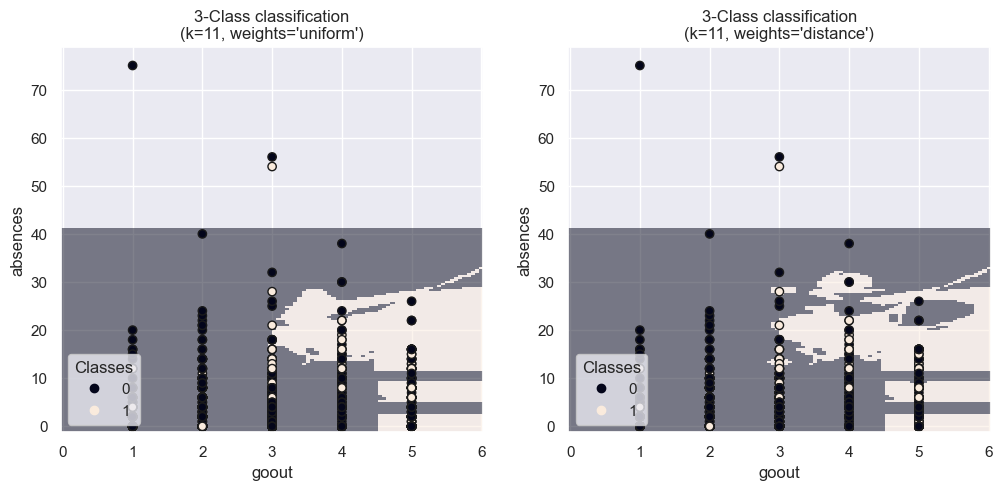

In [34]:
# Classification - duplicate for testing
X = students[["goout", "absences"]]
y = students['alc']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        students['alc'].unique(),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

################################


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'students' is your preprocessed DataFrame
features = students.drop(columns=['alc'])
target = students['alc']

# Encode categorical variables
categorical_cols = features.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features[col] = label_encoders[col].fit_transform(features[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# More detailed evaluation
print(classification_report(y_test, y_pred))

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision) # OVERALL precision

Accuracy: 0.9651741293532339
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       149
           1       0.98      0.88      0.93        52

    accuracy                           0.97       201
   macro avg       0.97      0.94      0.95       201
weighted avg       0.97      0.97      0.96       201

Precision:  0.9787234042553191


What these results mean

- Precision = Accuracy of poistive predictions
- 96% of the instances predicted as not consuming alcohol were actually not consuming alcohol.
-  98% of the instances predicted as consuming alcohol were actually consuming alcohol.

-Recall = the ability of the model to correctly identify positive instances.
        = True Positives / (True Positives + False Negatives)
- 99% of the actual instances of not consuming alcohol were correctly predicted by the model.
- 88% of the actual instances of consuming alcohol were correctly predicted by the model.

################################

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'students' is your DataFrame
# Convert categorical variables to dummy variables (one-hot encoding)
students_encoded = pd.get_dummies(students, drop_first=True)

# Now 'X' will have only numeric features, and 'y' remains the same
X = students_encoded.drop(columns=['alc'])
y = students_encoded['alc']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9337748344370861
